# HNP Linear Regression

### Input
Feature-vector of size n

### Output (1): 
k,d of linear regression line
### Output (2): 
Feature-prediction (extrapolation)

In [3]:
import hnumpy as hnp
import numpy as np
import matplotlib.pyplot as plt

### np.dot(x,x) vs. np.sum(x**2)

In [16]:
def Sxx_dot(x):
    return np.dot(x,x)

def Sxx_sum(x):
    return np.sum(x**2)

2022-01-10 14:12:55.926 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling Sxx_dot into an FHE function
2022-01-10 14:12:55.927 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 14:12:55.929 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 14:12:55.930 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 14:12:55.935 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-10 14:12:55.937 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-10 14:12:55.938 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-10 14:12:55.939 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling Sxx_sum into an FHE function
2022-01-10 14:12:55.941 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 14:12:55.942 | INFO     | hnumpy.convert:compile_homomo

2022-01-10 14:12:56.186 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 14:12:56.188 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 14:12:56.199 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-10 14:12:56.201 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-10 14:12:56.204 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-10 14:12:56.214 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling Sxx_dot into an FHE function
2022-01-10 14:12:56.216 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 14:12:56.217 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 14:12:56.219 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 14:12:56.232 | INFO     | hnumpy.co

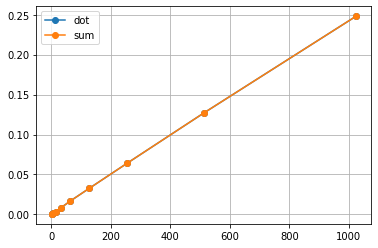

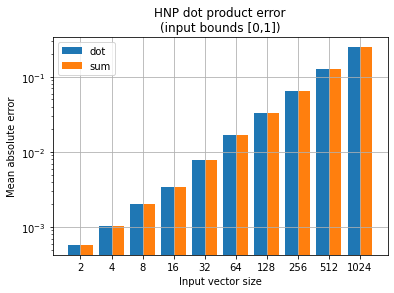

2022-01-10 14:12:57.411 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling Sxx_dot into an FHE function
2022-01-10 14:12:57.412 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 14:12:57.412 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 14:12:57.414 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 14:12:57.418 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-10 14:12:57.419 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-10 14:12:57.421 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-10 14:12:57.422 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling Sxx_sum into an FHE function
2022-01-10 14:12:57.422 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 14:12:57.423 | INFO     | hnumpy.convert:compile_homomo

2022-01-10 14:12:57.688 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 14:12:57.691 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 14:12:57.703 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-10 14:12:57.706 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-10 14:12:57.708 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-10 14:12:57.722 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling Sxx_dot into an FHE function
2022-01-10 14:12:57.724 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 14:12:57.727 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 14:12:57.729 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 14:12:57.742 | INFO     | hnumpy.co

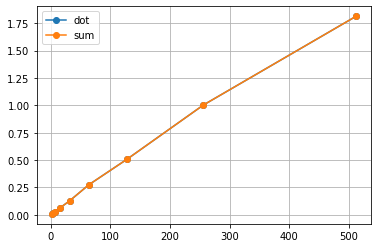

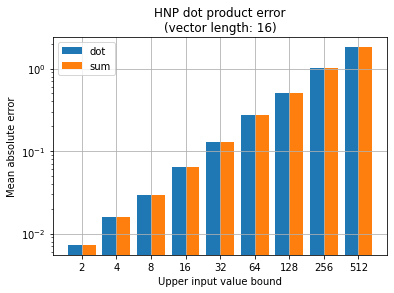

In [93]:
dot_err = []
sum_err = []

rounds = 10

# varying input size
for n in range(1,11):
    N = 2**n
    
    he_sxx_dot = hnp.compile_fhe(
        Sxx_dot,
        {
            "x": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,))
        }
    )
    
    he_sxx_sum = hnp.compile_fhe(
        Sxx_sum,
        {
            "x": hnp.encrypted_ndarray(bounds=(0,1), shape=(N,))
        }
    )
    
    cumm_error_dot = 0
    cumm_error_sum = 0
    for r in range(rounds):
        x = np.random.uniform(0, 1, (N,))
        cumm_error_dot += np.abs(he_sxx_dot.simulate(x)[0] - np.dot(x,x))
        cumm_error_sum += np.abs(he_sxx_sum.simulate(x)[0] - np.sum(x**2))
        
    
    dot_err.append(cumm_error_dot / rounds)
    sum_err.append(cumm_error_sum / rounds)
    

x_axis = [2**n for n in range(1,11)]

plt.plot(x_axis, dot_err, "o-", label="dot")
plt.plot(x_axis, sum_err, "o-", label="sum")
plt.grid()
plt.legend()
plt.show()

bars_x = np.arange(len(x_axis))
plt.bar(bars_x - 0.2, dot_err, 0.4, label="dot")
plt.bar(bars_x + 0.2, sum_err, 0.4, label="sum")
plt.xticks(bars_x, x_axis)
plt.legend()
plt.yscale('log')
plt.grid()
plt.title("HNP dot product error\n(input bounds [0,1])")
plt.ylabel("Mean absolute error")
plt.xlabel("Input vector size")
plt.show()


# varying bounds
dot_err = []
sum_err = []
LEN = 16
nmax = 10
for n in range(1,nmax):
    N = 2**n
    
    he_sxx_dot = hnp.compile_fhe(
        Sxx_dot,
        {
            "x": hnp.encrypted_ndarray(bounds=(0,N), shape=(LEN,))
        }
    )
    
    he_sxx_sum = hnp.compile_fhe(
        Sxx_sum,
        {
            "x": hnp.encrypted_ndarray(bounds=(0,N), shape=(LEN,))
        }
    )
    
    cumm_error_dot = 0
    cumm_error_sum = 0
    for r in range(rounds):
        x = np.random.uniform(0, 1, (LEN,))
        cumm_error_dot += np.abs(he_sxx_dot.simulate(x)[0] - np.dot(x,x))
        cumm_error_sum += np.abs(he_sxx_sum.simulate(x)[0] - np.sum(x**2))
        
    
    dot_err.append(cumm_error_dot / rounds)
    sum_err.append(cumm_error_sum / rounds)

x_axis = [2**n for n in range(1,nmax)]

plt.plot(x_axis, dot_err, "o-", label="dot")
plt.plot(x_axis, sum_err, "o-", label="sum")
plt.grid()
plt.legend()
plt.show()

bars_x = np.arange(len(x_axis))
plt.bar(bars_x - 0.2, dot_err, 0.4, label="dot")
plt.bar(bars_x + 0.2, sum_err, 0.4, label="sum")
plt.xticks(bars_x, x_axis)
plt.legend()
plt.yscale('log')
plt.grid()
plt.title(f"HNP dot product error\n(vector length: {LEN})")
plt.ylabel("Mean absolute error")
plt.xlabel("Upper input value bound")
plt.show()

## Cleartext Linear Regression Implementations (Analytic)

In [1]:
N = 8

def linreg_sums(x,y):
    Sxy = np.dot(x,y)
    Sx  = np.sum(x)
    Sy  = np.sum(y)
    Sxx = np.dot(x,x) # np.sum(x**2)
    
    denom = (N * Sxx - Sx * Sx)
    
    k = (N * Sxy - Sx * Sy) / denom
    d = (Sy * Sxx - Sx * Sxy) / denom
    
    return (k,d)

def linreg_mean(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k = np.dot(x-x_mean, y-y_mean) / np.sum((x-x_mean)**2)
    d = y_mean - k * x_mean
    
    return (k,d)

### Sample Data

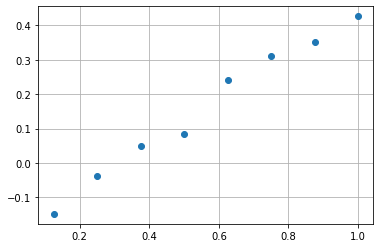

In [197]:
samples = 8

xs = np.linspace(0,1,samples+1)[1:]
ys = -0.2 + xs * 0.64 + np.random.uniform(-0.05, 0.05, len(xs))

plt.plot(xs,ys, "o")
plt.grid()
plt.show()

#### Clear Result

In [198]:
print( linreg_sums(xs,ys) )
print( linreg_mean(xs,ys) )

(0.6583342199876088, -0.21039309054007474)
(0.6583342199876087, -0.21039309054007466)


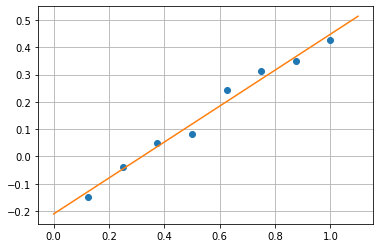

In [199]:
k,d = linreg_sums(xs,ys)

xreg = np.linspace(0,1.1,50)
yreg = k * xreg + d

plt.plot(xs,ys, "o")
plt.plot(xreg,yreg)
plt.grid()
plt.show()

### HNP compiled functions

In [4]:
he_lr_sums = hnp.compile_fhe(
    linreg_sums,
    {
        "x": hnp.encrypted_ndarray(bounds=(0.001,1.1), shape=(N,)),
        "y": hnp.encrypted_ndarray(bounds=(-0.5, 0.5), shape=(N,)),
    }
)

2022-01-12 08:12:34.321 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling linreg_sums into an FHE function
2022-01-12 08:12:34.323 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-12 08:12:34.326 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-12 08:12:34.330 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-12 08:12:34.384 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-12 08:12:34.387 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-12 08:12:34.393 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller


In [5]:
he_lr_mean = hnp.compile_fhe(
    linreg_mean,
    {
        "x": hnp.encrypted_ndarray(bounds=(0.001,1.1), shape=(N,)),
        "y": hnp.encrypted_ndarray(bounds=(-0.5, 0.5), shape=(N,)),
    }
)

2022-01-12 08:12:36.031 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling linreg_mean into an FHE function
2022-01-12 08:12:36.032 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-12 08:12:36.034 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-12 08:12:36.036 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-12 08:12:36.075 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-12 08:12:36.077 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-12 08:12:36.080 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller


### Simulate results

In [202]:
he_lr_sums.simulate(xs,ys)

(array([9.93752019e+15]), array([9.9375202e+15]))

In [203]:
he_lr_mean.simulate(xs,ys)

(array([-708517.27697754]), array([-2.77259834e+20]))

### Real results

In [192]:
# create context
context = he_lr_sums.create_context()

# key generation
keys = context.keygen()


2022-01-10 14:51:43.362 | INFO     | hnumpy.client:keygen:28 - Creating 1 keyswitching key(s) and 2 bootstrapping key(s). This should take approximately 70 seconds (1.1666666666666667 minutes)
2022-01-10 15:04:33.666 | DEBUG    | hnumpy.client:keygen:42 - Key creation time took 770.3012251689979 seconds


  keygen ... done


NameError: name 'he_fct' is not defined

In [195]:
result = he_lr_sums.encrypt_and_run(keys, xs, ys)
print(result)

(array([1.97373668e+22]), array([-4.49591111e+19]))


### split up ?!

In [251]:
def linreg_sums(x,y):
    Sxy = np.dot(x,y)
    Sx  = np.sum(x)
    Sy  = np.sum(y)
    Sxx = np.dot(x,x) # np.sum(x**2)
    
    denom = (N * Sxx - Sx * Sx)
    
    k = (N * Sxy - Sx * Sy) / denom
    d = (Sy * Sxx - Sx * Sxy) / denom
    
    return (k,d)

def linreg_mean(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    k = np.dot(x-x_mean, y-y_mean) / np.sum((x-x_mean)**2)
    d = y_mean - k * x_mean
    
    return (k,d)

def k_num(x,y):
    Sxy = np.dot(x,y)
    Sx  = np.sum(x)
    Sy  = np.sum(y)
    
    return (N * Sxy - Sx * Sy)

def d_num(x,y):
    Sxy = np.dot(x,y)
    Sx  = np.sum(x)
    Sy  = np.sum(y)
    Sxx = np.dot(x,x)
    
    return (Sy * Sxx - Sx * Sxy)

def denom(x,y):
    Sx  = np.sum(x)
    Sxx = np.dot(x,x)
    
    return (N * Sxx - Sx * Sx)

def k(x,y):
    # return k_num(x,y) / denom(x,y)
    return np.divide(k_num(x,y), denom(x,y))

In [252]:
he_k_num = hnp.compile_fhe(
    k_num,
    {
        "x": hnp.encrypted_ndarray(bounds=(0.001,1.1), shape=(N,)),
        "y": hnp.encrypted_ndarray(bounds=(-0.5, 0.5), shape=(N,)),
    }
)

he_denom = hnp.compile_fhe(
    denom,
    {
        "x": hnp.encrypted_ndarray(bounds=(0.001,1.1), shape=(N,)),
        "y": hnp.encrypted_ndarray(bounds=(-0.5, 0.5), shape=(N,)),
    }
)

he_k = hnp.compile_fhe(
    k,
    {
        "x": hnp.encrypted_ndarray(bounds=(0.001,1.1), shape=(N,)),
        "y": hnp.encrypted_ndarray(bounds=(-0.5, 0.5), shape=(N,)),
    }
)

2022-01-10 15:34:23.703 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling k_num into an FHE function
2022-01-10 15:34:23.704 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 15:34:23.706 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 15:34:23.708 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 15:34:23.730 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-10 15:34:23.733 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-10 15:34:23.738 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller
2022-01-10 15:34:23.741 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling denom into an FHE function
2022-01-10 15:34:23.743 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 15:34:23.747 | INFO     | hnumpy.convert:compile_homomorphi

In [232]:
num = k_num(xs,ys)
print(num)

3.4562546549349458


In [233]:
den = denom(xs,ys)
print(den)

5.25


In [234]:
print(num/den)

0.6583342199876088


In [243]:
hn = he_k_num.simulate(xs,ys)
print(hn)

[3.40378559]


In [244]:
hd = he_denom.simulate(xs,ys)
print(hd)

[5.09517847]


In [245]:
print(hn/hd)

[0.6680405]


In [246]:
np.divide(4,2)

2.0

In [253]:
k(xs,ys)

0.6583342199876088

In [254]:
he_k.simulate(xs,ys)

array([9.93752019e+15])

In [264]:
def div(a,b):
    return np.divide(a,b)

In [276]:
he_div = hnp.compile_fhe(
    div,
    {
        "a": hnp.encrypted_ndarray(bounds=(0,50), shape=(4,)),
        "b": hnp.encrypted_ndarray(bounds=(1,100), shape=(4,)),
    }
)

2022-01-10 16:18:48.607 | INFO     | hnumpy.convert:compile_fhe:381 - Compiling div into an FHE function
2022-01-10 16:18:48.609 | INFO     | hnumpy.convert:compile_fhe:383 - Checking input and output
2022-01-10 16:18:48.613 | INFO     | hnumpy.convert:compile_homomorphic:265 - Create target graph
2022-01-10 16:18:48.615 | INFO     | hnumpy.convert:compile_homomorphic:270 - Optimize target graph with optimizer `heuristic`
2022-01-10 16:18:48.633 | INFO     | hnumpy.convert:compile_homomorphic:284 - Correct encoding
2022-01-10 16:18:48.634 | INFO     | hnumpy.convert:compile_homomorphic:290 - Create VM graph
2022-01-10 16:18:48.636 | INFO     | hnumpy.convert:compile_homomorphic:306 - Return the result to the caller


In [277]:
a = np.random.uniform(0,50,(4,))
b = np.random.uniform(1,100,(4,))

In [278]:
print(a)
print(b)
print()
print(np.divide(a,b))

[26.79366858  1.11174114 25.57885677 30.80076884]
[87.5664014  12.58412312 82.31403483 17.18503711]

[0.30598115 0.08834474 0.31074721 1.79230156]


In [279]:
he_div.simulate(a,b)

array([0.23881571, 0.09333542, 0.22792997, 1.84073571])

In [280]:
context = he_div.create_context()

In [281]:
keys = context.keygen()

2022-01-10 16:18:58.829 | INFO     | hnumpy.client:keygen:28 - Creating 1 keyswitching key(s) and 1 bootstrapping key(s). This should take approximately 40 seconds (0.6666666666666666 minutes)
2022-01-10 16:23:38.145 | DEBUG    | hnumpy.client:keygen:42 - Key creation time took 279.3116063069974 seconds


In [282]:
he_div.encrypt_and_run(keys,a,b)

array([ 7.39187728, -0.06713114, -3.00340629,  6.91679815])